In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_path = '../data/DS_ML Coding Challenge Dataset.xlsx'
#dataset = pd.read_excel(dataset_path, sheet_name='Training Dataset', index_col='Month of Sourcing',parse_dates=True)
dataset = pd.read_excel(dataset_path, sheet_name='Training Dataset')

In [3]:
dataset2 = dataset.copy()

In [96]:
dataset = dataset2.copy()

In [97]:
dataset.rename(columns={'ProductType':'ProductName'}, inplace=True)
dataset.columns = [column_name.replace(' ','') for column_name in dataset.columns]

In [104]:
for column in dataset.columns.drop(['SourcingCost','MonthofSourcing']):
    print(dataset[column].value_counts().to_frame())

      ProductName
NTM2       236726
NTM1       194923
NTM3       118527
    Manufacturer
X1        419857
X2        120695
X3          9624
     AreaCode
A28     41925
A7      36723
A3      33247
A11     31111
A8      28772
A44     26490
A5      24252
A10     22970
A25     20422
A31     18379
A29     18105
A16     15938
A12     14547
A40     13820
A21     13374
A43     13234
A2      13145
A1      12676
A6      12399
A4      11326
A24     10725
A18     10154
A9      10107
A22      9624
A14      9424
A35      8877
A45      8188
A13      7548
A42      6470
A33      5769
A15      5496
A32      5408
A36      4843
A34      4249
A19      3839
A38      3065
A26      2360
A30      2357
A20      2126
A46      1732
A39      1702
A37      1432
A17      1139
A23       569
A41       118
           SourcingChannel
DIRECT              453617
RETAIL               60011
ECOM                 31106
WHOLESALE             5442
            ProductSize
Large            325566
Small            220462
ExtraLarg

In [110]:
b = []
for i in range(47):
    b.append('A'+str(i))
print(b)

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46']


In [6]:
a = 'ProductName'
prev = a
column_names = ['Manufacturer','SourcingChannel','ProductSize','ProductType','AreaCode']
heirarchy = ['ProductName']

for column in column_names:
    a = a + '_' + column
    dataset[a] = dataset[prev].map(str) + '_' + dataset[column]
    prev = a
    heirarchy.append(a)
    #print(a)

In [9]:
for column in heirarchy:
    print(column, len(dataset[column].unique()))

ProductName 3
ProductName_Manufacturer 7
ProductName_Manufacturer_SourcingChannel 16
ProductName_Manufacturer_SourcingChannel_ProductSize 29
ProductName_Manufacturer_SourcingChannel_ProductSize_ProductType 35
ProductName_Manufacturer_SourcingChannel_ProductSize_ProductType_AreaCode 96


In [36]:
heirarchy[:2]

['ProductName', 'ProductName_Manufacturer']

Level : 0
Level : 1
Level : 2


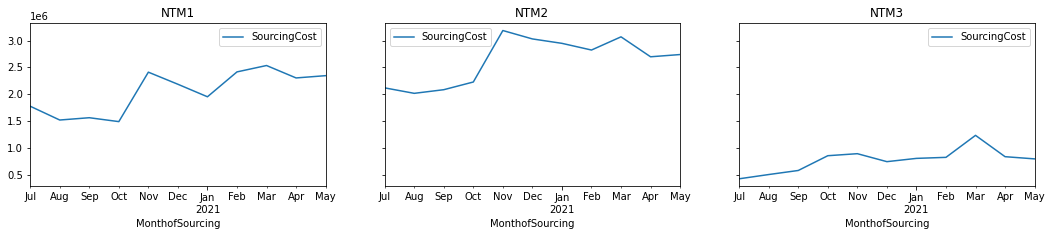

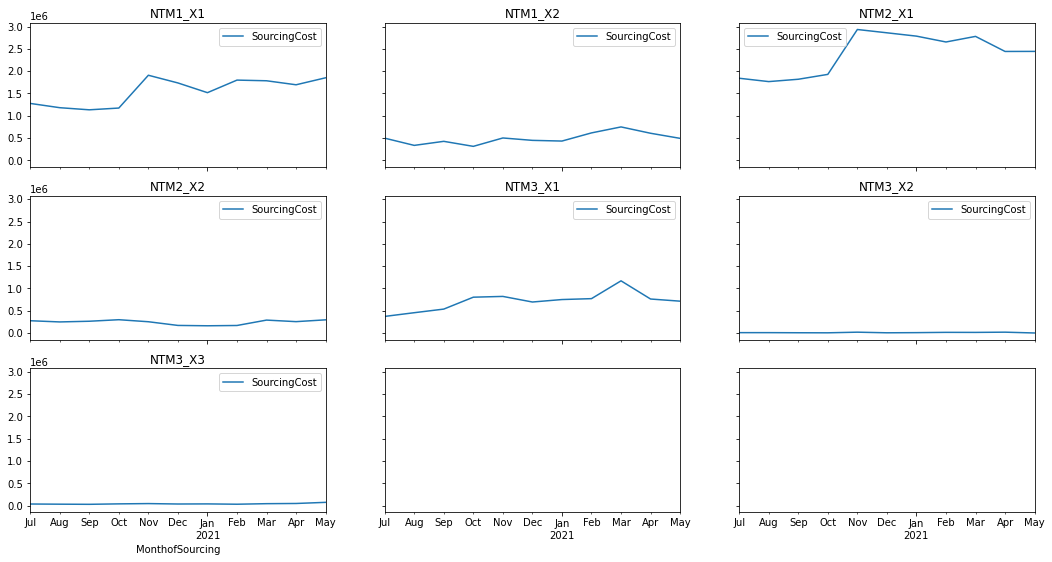

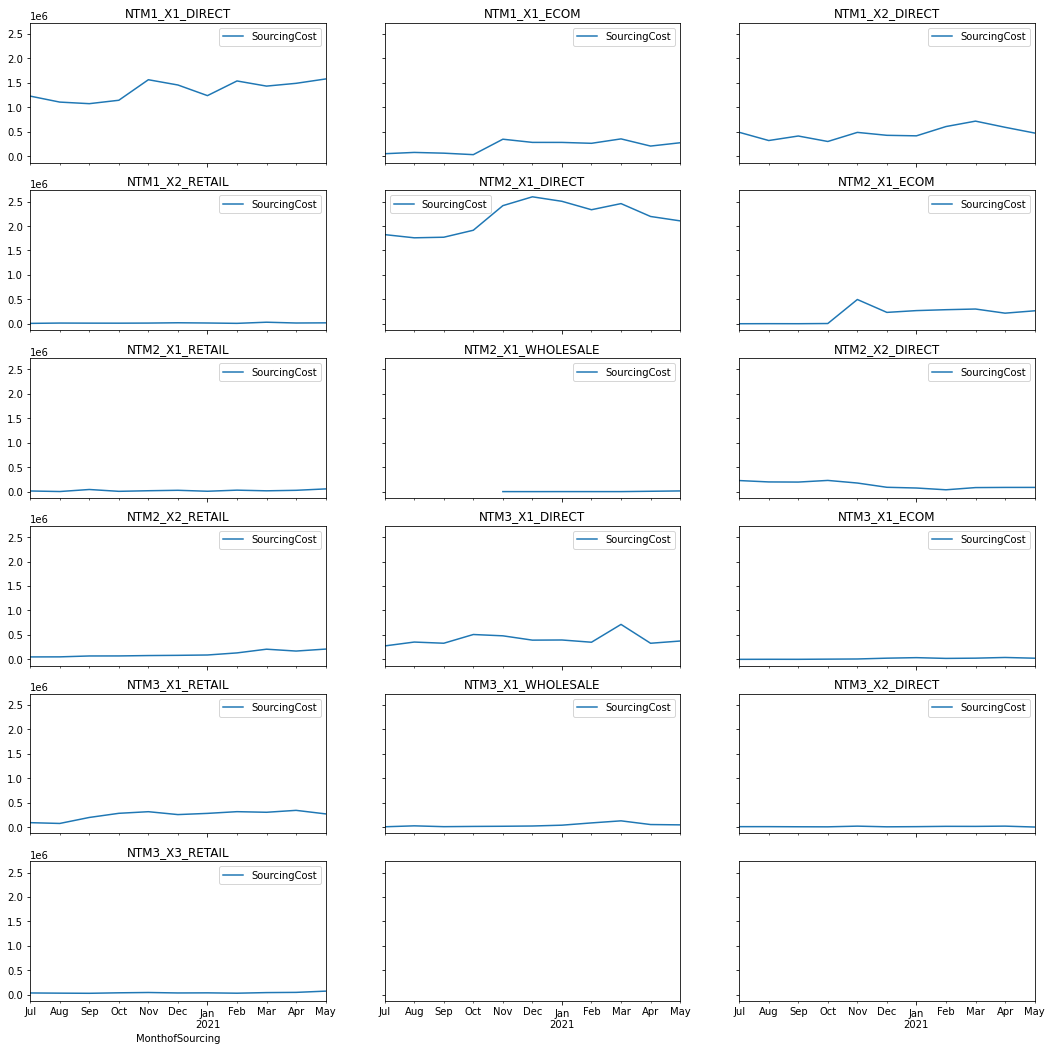

In [95]:
for level in range(len(heirarchy[:3])):
    print("Level :",level)
    
    gb = dataset.groupby(heirarchy[level])
    groups = [gb.get_group(group_name) for group_name in gb.groups]

    nrows = int(np.ceil(len(groups)/3))
    no_of_nodes = dataset[heirarchy[level]].unique()
    fig_height = int(np.ceil(len(no_of_nodes)/3)*3)
    fig, axis = plt.subplots(nrows=nrows, ncols=3, sharey=True, sharex=True, figsize=(18,fig_height))

    x = 0
    y = 0
    axis = np.array(axis)
    for group in groups:
        if(axis.ndim==1):
            group.groupby('MonthofSourcing').sum().plot(ax=axis[y], title=group[heirarchy[level]].unique(), subplots=True)
        else:
            group.groupby('MonthofSourcing').sum().plot(ax=axis[x,y], title=group[heirarchy[level]].unique(), subplots=True)
        
        if(y==2):
            x += 1
        y = int((y+1)%3)


In [59]:
axis

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

<AxesSubplot:xlabel='MonthofSourcing'>

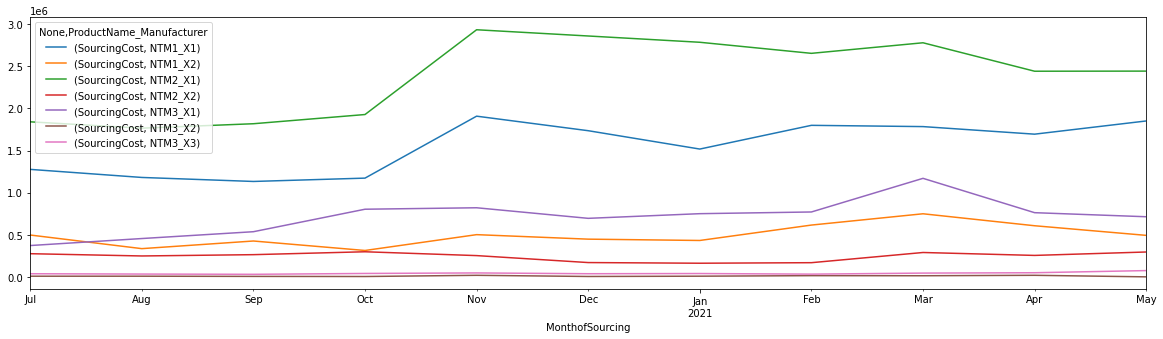

In [10]:
dataset.groupby(['ProductName_Manufacturer','MonthofSourcing']).sum().unstack(0).plot(figsize=(20,5))

<AxesSubplot:xlabel='MonthofSourcing'>

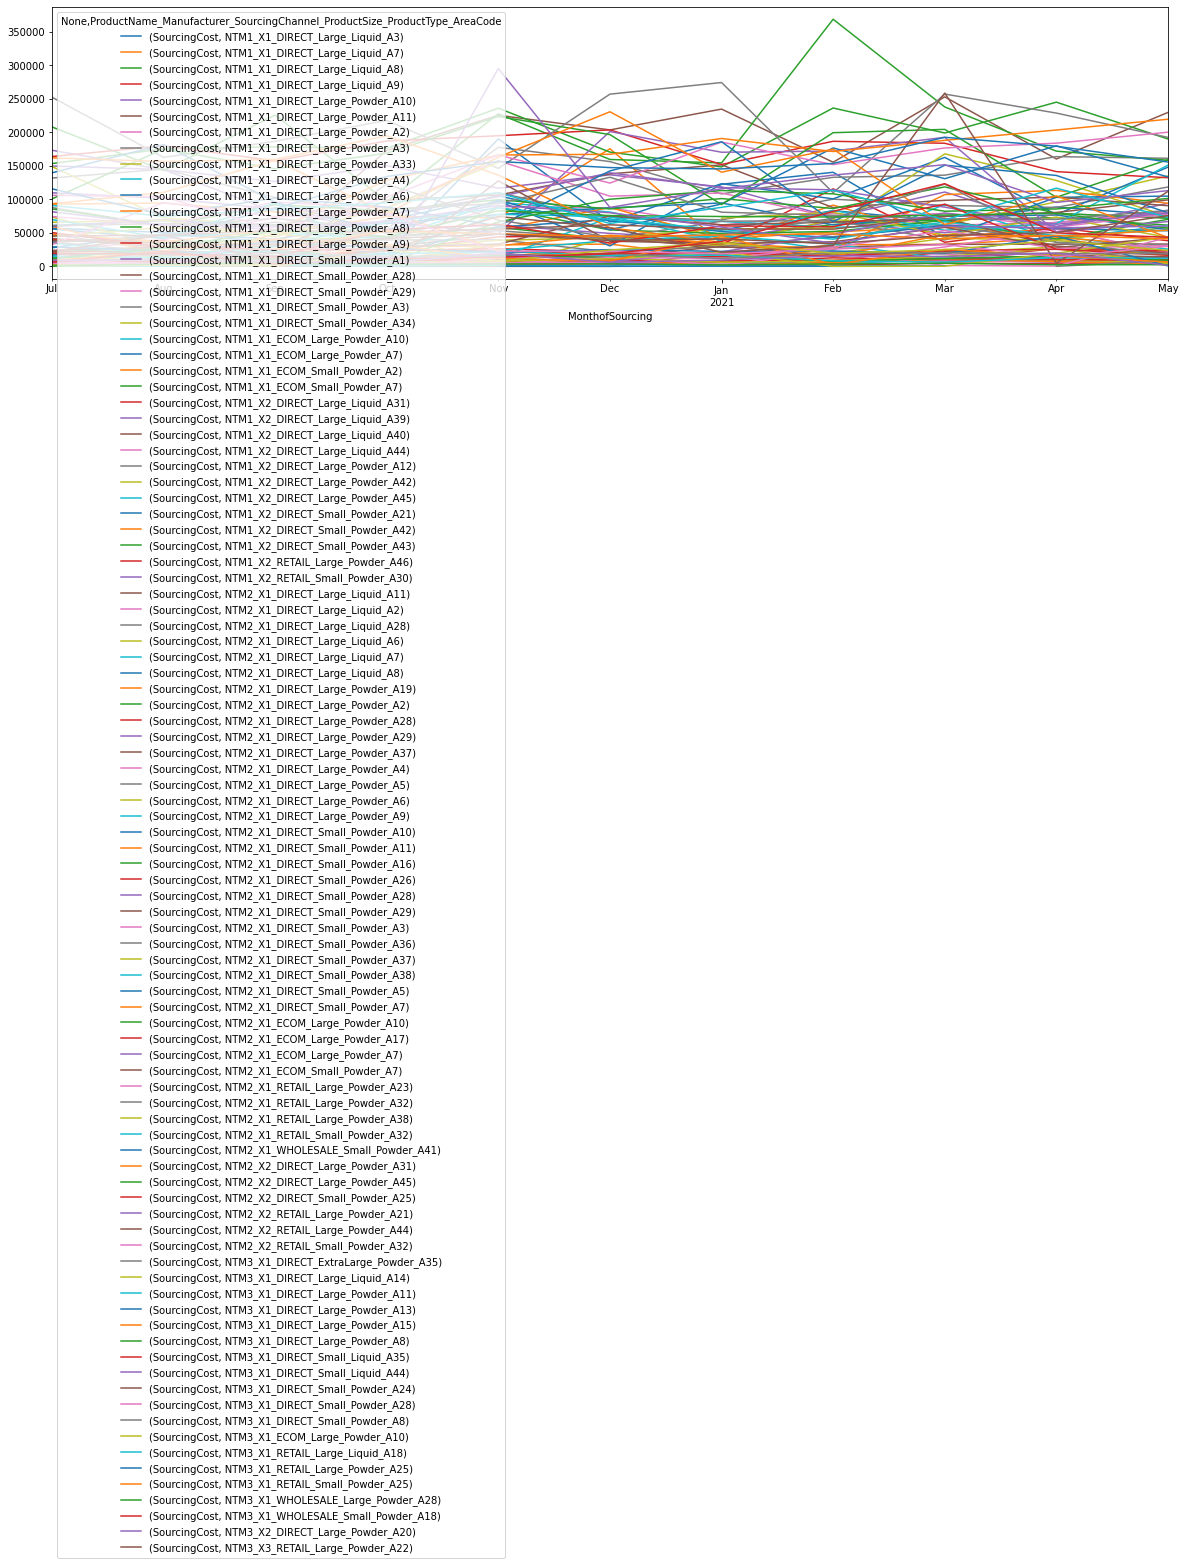

In [35]:
dataset.groupby(['ProductName_Manufacturer_SourcingChannel_ProductSize_ProductType_AreaCode','MonthofSourcing']).sum().unstack(0).plot(figsize=(20,5))

In [23]:
gb = dataset.groupby(['ProductName_Manufacturer'])
groups = [gb.get_group(group_name) for group_name in gb.groups]


In [27]:
for group in groups:
    group.plo

,ProductName,Manufacturer,AreaCode,SourcingChannel,ProductSize,ProductType,MonthofSourcing,SourcingCost,ProductName_Manufacturer,ProductName_Manufacturer_SourcingChannel,ProductName_Manufacturer_SourcingChannel_ProductSize,ProductName_Manufacturer_SourcingChannel_ProductSize_ProductType,ProductName_Manufacturer_SourcingChannel_ProductSize_ProductType_AreaCode
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Large,NTM2_X1_DIRECT_Large_Powder,NTM2_X1_DIRECT_Large_Powder_A9
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Large,NTM2_X1_DIRECT_Large_Liquid,NTM2_X1_DIRECT_Large_Liquid_A28
6,NTM2,X1,A19,DIRECT,Large,Powder,2020-09-01,105.589,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Large,NTM2_X1_DIRECT_Large_Powder,NTM2_X1_DIRECT_Large_Powder_A19
7,NTM2,X1,A29,DIRECT,Small,Powder,2021-03-01,90.775,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Small,NTM2_X1_DIRECT_Small_Powder,NTM2_X1_DIRECT_Small_Powder_A29
10,NTM2,X1,A7,ECOM,Small,Powder,2021-03-01,141.582,NTM2_X1,NTM2_X1_ECOM,NTM2_X1_ECOM_Small,NTM2_X1_ECOM_Small_Powder,NTM2_X1_ECOM_Small_Powder_A7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550169,NTM2,X1,A28,DIRECT,Large,Powder,2021-02-01,216.339,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Large,NTM2_X1_DIRECT_Large_Powder,NTM2_X1_DIRECT_Large_Powder_A28
550170,NTM2,X1,A29,DIRECT,Large,Powder,2020-11-01,56.520,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Large,NTM2_X1_DIRECT_Large_Powder,NTM2_X1_DIRECT_Large_Powder_A29
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Large,NTM2_X1_DIRECT_Large_Powder,NTM2_X1_DIRECT_Large_Powder_A5
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639,NTM2_X1,NTM2_X1_DIRECT,NTM2_X1_DIRECT_Small,NTM2_X1_DIRECT_Small_Powder,NTM2_X1_DIRECT_Small_Powder_A5


In [43]:
np.ceil(len(groups)/3)

3.0

<AxesSubplot:xlabel='MonthofSourcing'>

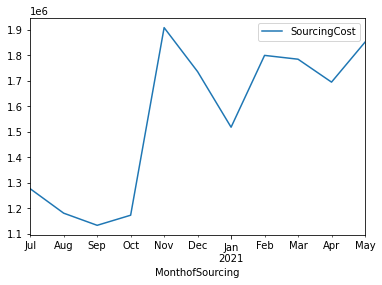

In [33]:
groups[0].groupby('MonthofSourcing').sum().plot()